# Marche Aléatoire - 1D et 2D

## Étudiant: LEMES DE MEDEIROS Célio Lucas

Question 1

In [113]:
import random
import matplotlib.pyplot as plt

In [114]:
def marche_aleatoire(n):
    trajectoire = [0]
    for _ in range(n):
        # Génère un nombre aléatoire 1 ou -1
        pas = random.choice([1, -1])
        trajectoire.append(pas)
    return trajectoire

In [115]:
nombre_de_pas = 10

In [116]:
trajectoire = marche_aleatoire(nombre_de_pas)
print(trajectoire)

[0, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1]


Question 2

In [117]:
def marche_aleatoire(n):
    trajectoire = [0]  # Commencez à la position 0
    for _ in range(n):
        # Générez un nombre aléatoire 1 ou -1 avec une probabilité de 1/2
        pas = random.choice([1, -1])
        # Calculez la prochaine position en ajoutant le pas à la position précédente
        nouvelle_position = trajectoire[-1] + pas
        trajectoire.append(nouvelle_position)
    return trajectoire

# Valeurs de n
n = 10**2
#n = 10**3
#n = 10**5

In [118]:
trajectoire = marche_aleatoire(n)
print(trajectoire)

[0, -1, -2, -1, 0, -1, 0, -1, 0, 1, 0, -1, 0, 1, 2, 1, 2, 1, 0, 1, 0, -1, 0, 1, 0, -1, 0, -1, 0, 1, 0, -1, -2, -3, -2, -1, 0, 1, 2, 3, 2, 3, 4, 5, 4, 5, 4, 3, 2, 3, 2, 1, 0, -1, -2, -1, 0, 1, 0, 1, 2, 1, 2, 3, 2, 1, 0, -1, 0, -1, -2, -3, -2, -3, -4, -5, -4, -3, -4, -3, -2, -1, 0, 1, 2, 3, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0]


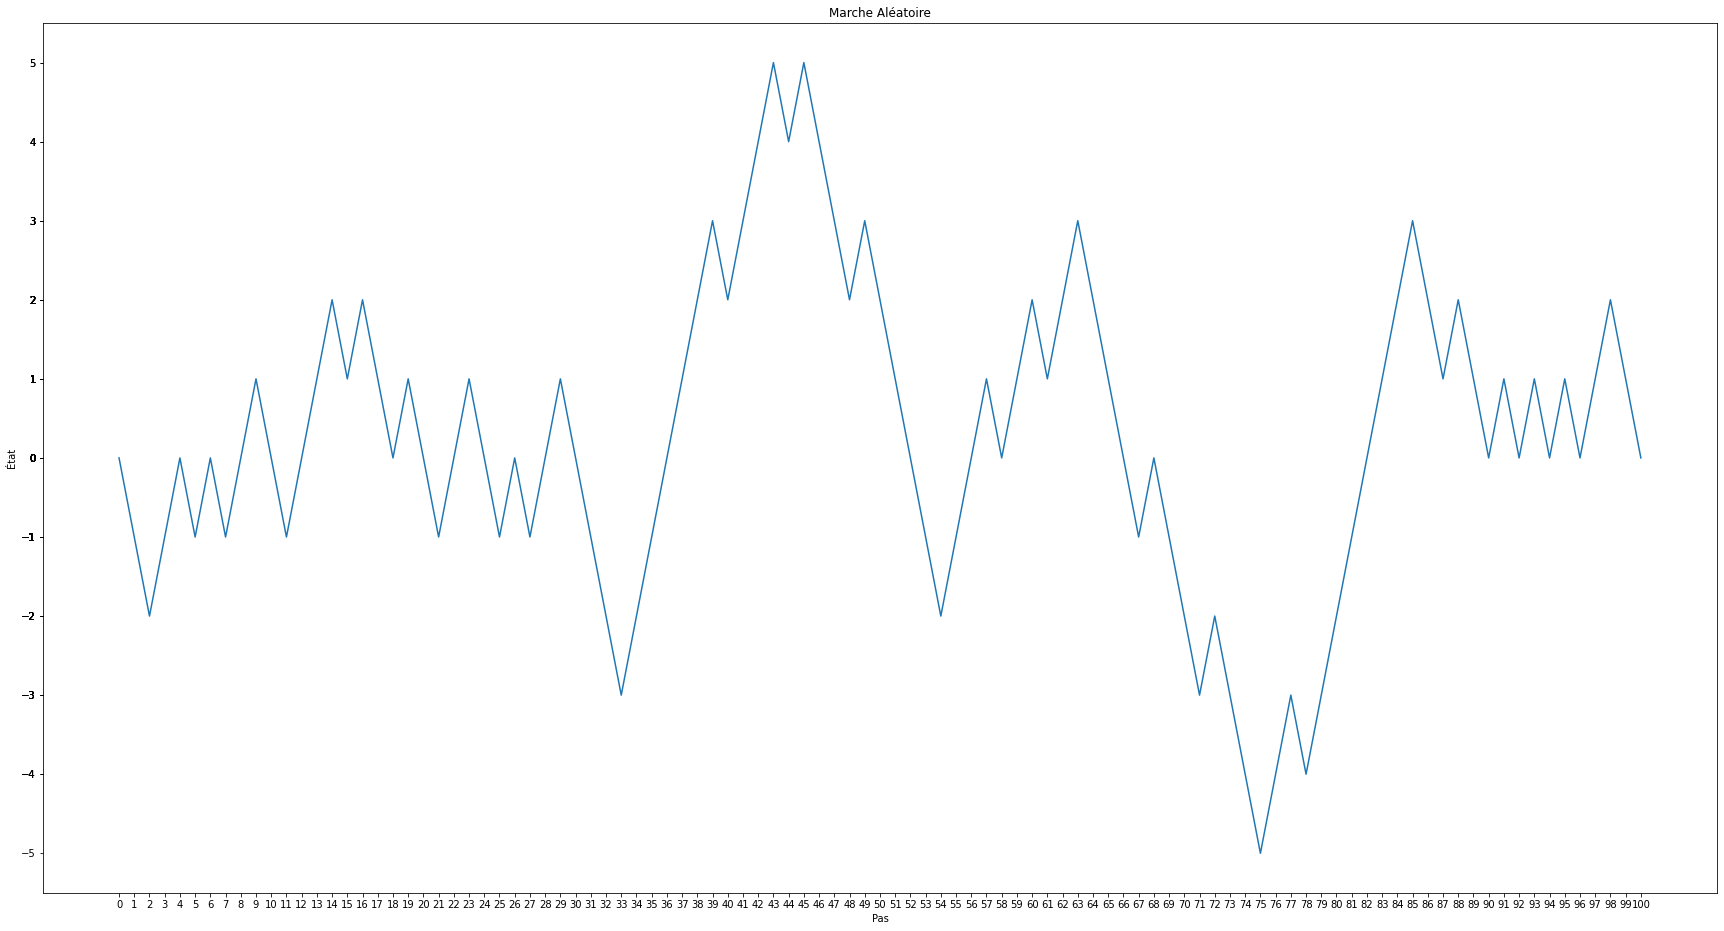

In [119]:
plt.figure(figsize=(30, 16))
plt.xlabel("Pas")
plt.ylabel("État")
plt.title("Marche Aléatoire")
plt.yticks(trajectoire)
plt.xticks(range(n + 1))
plt.plot(trajectoire);

Question 3

In [120]:
def marche_aleatoire(n):
    trajectoire = [0]  # Nous commençons à la position 0
    temps_entre_visites = []  # Liste pour stocker les temps entre les visites à l'état 0
    derniere_visite = -1  # Variable pour suivre l'indice de la dernière visite à l'état 0
    for i in range(n):
        # Générer un nombre aléatoire 1 ou -1 avec une probabilité de 1/2
        pas = random.choice([1, -1])
        # Calculer la prochaine position en ajoutant le pas à la position précédente
        nouvelle_position = trajectoire[-1] + pas
        trajectoire.append(nouvelle_position)
        # Vérifier s'il y a eu une visite à l'état 0
        if nouvelle_position == 0 and i > 0:
            temps_de_visite = i - derniere_visite
            temps_entre_visites.append(temps_de_visite)
            derniere_visite = i
    return trajectoire, temps_entre_visites

# Définir le nombre d'étapes souhaité
nombre_d_etapes = 1000000  # La plus grande valeur de n que j’ai pu faire la simulation en moins d’une seconde

# Appeler la fonction pour créer la trajectoire et calculer les temps entre les visites
trajectoire, temps_entre_visites = marche_aleatoire(nombre_d_etapes)

# Calculer le temps moyen entre les visites à l'état 0
if temps_entre_visites:
    temps_moyen = sum(temps_entre_visites) / len(temps_entre_visites)
    print("Temps moyen entre les visites à l'état 0 :", temps_moyen)
else:
    print("Aucune visite à l'état 0.")

Temps moyen entre les visites à l'état 0 : 787.424345847554


Question 4

In [121]:
import math

def marche_aleatoire(n):
    position = 0
    for _ in range(n):
        # Générez un nombre aléatoire 1 ou -1 avec une probabilité de 1/2
        pas = random.choice([1, -1])
        # Calculez la prochaine position en ajoutant le pas à la position précédente
        position += pas
    return position

def estime_probabilite(n, k, m):

    probabilité_théorique = 0
    if (k + n) % 2 == 0:
        probabilité_théorique = (1 / (2**n)) * math.comb(n, (k + n) // 2)

    # Initialisez le compteur pour le décompte des réussites
    compteur_réussite = 0

    for _ in range(m):
        # Effectuez une simulation de la Marche Aléatoire avec n étapes
        position = marche_aleatoire(n)

        # Vérifiez si la position finale est égale à k et si n et k ont la même parité
        if position == k and (n + k) % 2 == 0:
            compteur_réussite += 1

    # Calculez la probabilité empirique
    probabilité_empirique = compteur_réussite / m

    return probabilité_théorique, probabilité_empirique

# Définissez les valeurs de n, k et m
n = 10  # Nombre d'étapes
k = 4   # Position souhaitée
m = 100000  # Nombre de simulations (plus le nombre de simulations est élevé, plus nous nous rapprochons de la valeur théorique)

# Estimez la probabilité et obtenez la probabilité théorique
probabilité_théorique, probabilité_empirique = estime_probabilite(n, k, m)

print(f"Probabilité théorique P(X_{n} = {k}): {probabilité_théorique}")
print(f"Probabilité estimée P(X_{n} = {k}): {probabilité_empirique}")

Probabilité théorique P(X_10 = 4): 0.1171875
Probabilité estimée P(X_10 = 4): 0.11738


Question 5

In [122]:
import math

def calcule_probabilité_transitoire(k, n):
    # Initialisez un tableau pour stocker les probabilités
    probabilités = [0] * (2 * n + 1)

    # Condition de base
    probabilités[n] = 1

    for _ in range(n):
        nouvelles_probabilités = [0] * (2 * n + 1)

        for i in range(2 * n + 1):
            if i > 0:
                nouvelles_probabilités[i] += 0.5 * probabilités[i - 1]
            if i < 2 * n:
                nouvelles_probabilités[i] += 0.5 * probabilités[i + 1]

        probabilités = nouvelles_probabilités

    return probabilités[n + k]
    
def estime_probabilité(n, k):

    probabilité_théorique = 0
    if (k + n) % 2 == 0:
        probabilité_théorique = (1 / (2**n)) * math.comb(n, (k + n) // 2)
    
    return probabilité_théorique

# Définissez les valeurs de k et n
k = -2  # Position souhaitée
n = 100  # Nombre d'étapes

# Calculez la probabilité théorique
probabilité_théorique = estime_probabilité(n, k)

# Calculez la probabilité P(X_n = k) en utilisant la relation de récurrence
probabilité_k_n = calcule_probabilité_transitoire(k, n)

print(f"Probabilité de régime transitoire P(X_{n} = {k}): {probabilité_k_n}")
print(f"Probabilité théorique P(X_{n} = {k}): {probabilité_théorique}")

Probabilité de régime transitoire P(X_100 = -2): 0.07802866410507725
Probabilité théorique P(X_100 = -2): 0.07802866410507722


Question 6

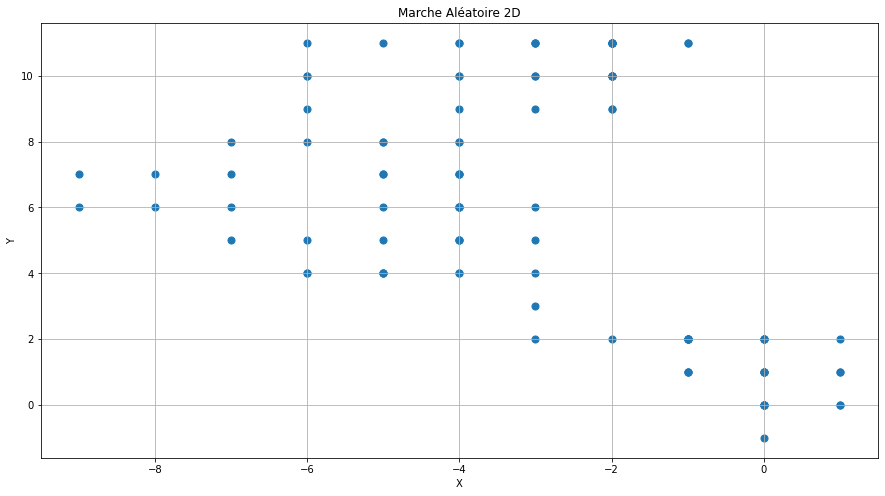

In [123]:
def marche_aleatoire_2d(n):
    trajectoire = [(0, 0)]  # Commencez à la position (0, 0)
    for _ in range(n):
        # Générez un mouvement aléatoire équiprobable en 2D
        mouvement = random.choice([(-1, 0), (1, 0), (0, 1), (0, -1)])
        # Calculez la prochaine position en ajoutant le mouvement à la position précédente
        nouvelle_position = (trajectoire[-1][0] + mouvement[0], trajectoire[-1][1] + mouvement[1])
        trajectoire.append(nouvelle_position)
    return trajectoire

# Définissez le nombre d'étapes souhaité
n = 10**2

trajectoire = marche_aleatoire_2d(n)

# Extraia as coordenadas X e Y dos pontos visitados
x, y = zip(*trajectoire)

# Créez un nuage de points pour représenter les points visités
plt.figure(figsize=(15, 8))
plt.scatter(x, y, marker='o', s=50)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Marche Aléatoire 2D")
plt.grid()
plt.show()